## Declarative Plotting Language
## 声明式画图编程

1. ggplot2 (or plotnine in Python)
2. seaborn

## 部分参考资料
- ggplot2官网(含官方小抄): https://ggplot2.tidyverse.org/
- R for Data Science: https://r4ds.had.co.nz/data-visualisation.html
- 中文教程: https://bookdown.org/wangminjie/R4DS/tidyverse-ggplot2-aes.html
- 画图实例: https://r-graph-gallery.com/
- plotnine: Python中画ggplot2:
- https://plotnine.readthedocs.io/en/stable/
- Seaborn官网: https://seaborn.pydata.org/


In [1]:
import math
import copy

import matplotlib.pyplot as plt
import numpy as np
# from manim import *
# import manimpango

In [2]:
import pandas as pd
import seaborn as sns
from plotnine import *

In [3]:
# import mpg database
mpg = pd.read_csv("mpg.csv")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## 画图步骤
1. 声明数据(\<data\>)
2. 声明数据到画图元素的映射(\<mappings\>)
3. 声明geom几何元素信息(\<coordinate_function\>)
4. (选)分解为多个子图(\<facet_function\>)
5. (选)横纵坐标格式(\<scale\>)
7. (选)调整风格
8. (选)格式调整处理（标题, 画图范围, 角标, 等等）


/opt/anaconda3/envs/manim/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


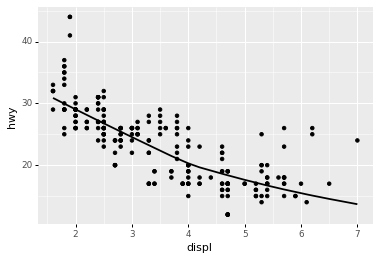

<ggplot: (8773268394489)>

In [4]:
(
    ggplot(mpg, aes(x='displ', y='hwy'))
    + geom_point()
    + geom_smooth()
)

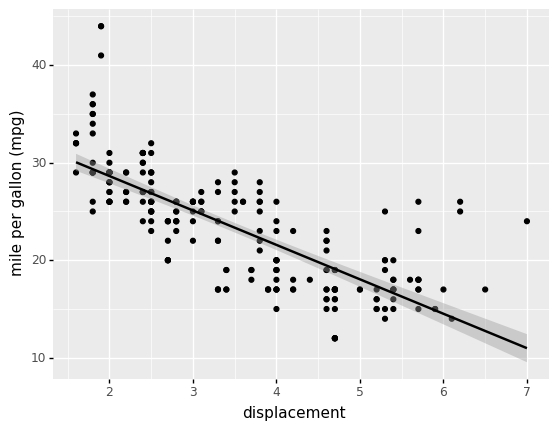

<ggplot: (8773204153245)>

In [5]:
(
    ggplot(mpg, aes(x='displ', y='hwy'))
    + geom_point()
    + geom_smooth(method='lm')
    + labs(x='displacement', y='mile per gallon (mpg)')
)

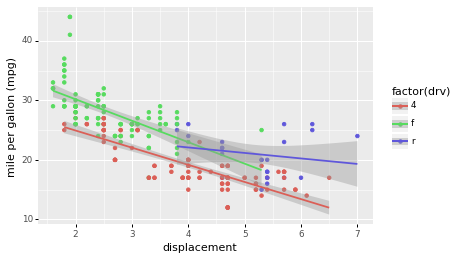

<ggplot: (8776699183749)>

In [4]:
(
    ggplot(mpg, aes(x='displ', y='hwy', color='factor(drv)'))
    + geom_point()
    + geom_smooth(method='lm')
    + labs(x='displacement', y='mile per gallon (mpg)')
)

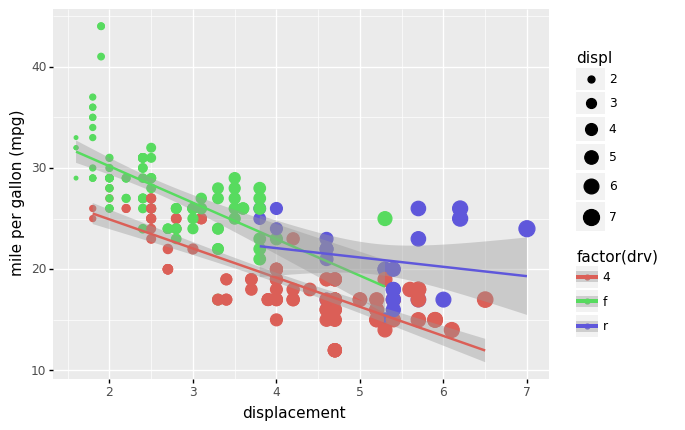

<ggplot: (8776632233477)>

In [6]:
(
    ggplot(mpg, aes(x='displ', y='hwy', 
                    color='factor(drv)'))
    + geom_point(aes(size='displ'))
    + geom_smooth(method='lm')
    + labs(x='displacement', y='mile per gallon (mpg)')
)

In [22]:
k = (
    ggplot(mpg, aes(x='displ', y='hwy', 
                    color='factor(drv)', size="displ"))
    + geom_point()
    + geom_smooth(method='lm')
    + labs(x='displacement', y='mile per gallon (mpg)')
)

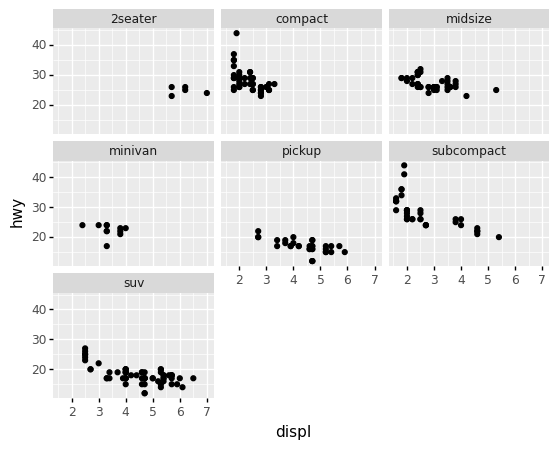

<ggplot: (8773234724849)>

In [10]:
(
    ggplot(mpg, aes("displ", "hwy")) + 
    geom_point() + 
    facet_wrap("class")
)

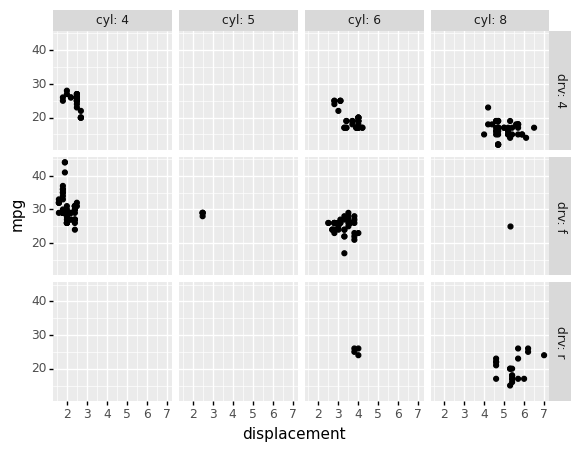

<ggplot: (8773117069389)>

In [16]:
(
    ggplot(mpg, aes(x='displ', y='hwy'))
    + geom_point()
    + facet_grid('drv ~ cyl', labeller='label_both')
    + labs(x='displacement', y='mpg')
)

# example 2. Faithful

In [17]:
from plotnine.data import faithful
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


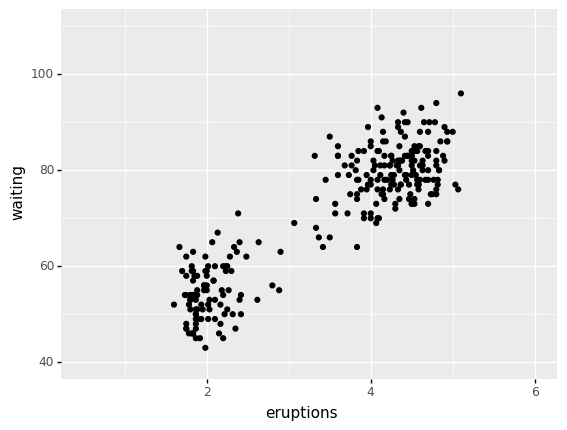

<ggplot: (8773285040973)>

In [18]:
(
    ggplot(faithful, aes(x="eruptions", y="waiting")) +
    geom_point() +
    xlim(0.5, 6) +
    ylim(40, 110)
)

In [19]:
import plotnine as p9

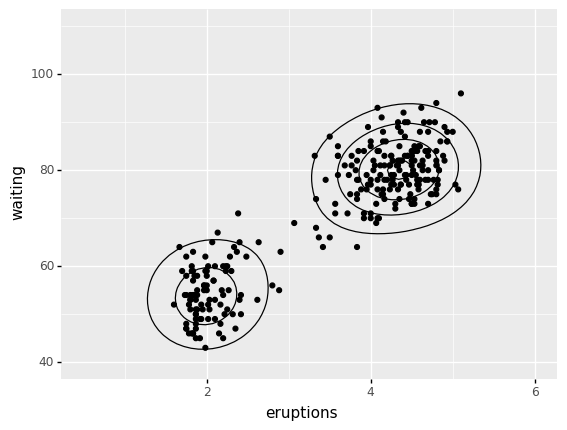

<ggplot: (8773234753357)>

In [20]:
# there is a small bug in plotnine for "geom_density_2d", 
# you need to manually fix it or download a unofficial version
# see: https://github.com/has2k1/plotnine/commit/586b51e6103eb91b68c3f6a9dbc7fb36aa2a2208#diff-4d814b59de05d4050e8d55d01ffe532ea3cf2fcad789f21f0a864c3f28b41b3a
g = (
    ggplot(aes(x='eruptions', y='waiting'), data=faithful)
    + geom_point()
    + geom_density_2d()
    + lims(x=(0.5, 6), y =(40, 110))
)
g

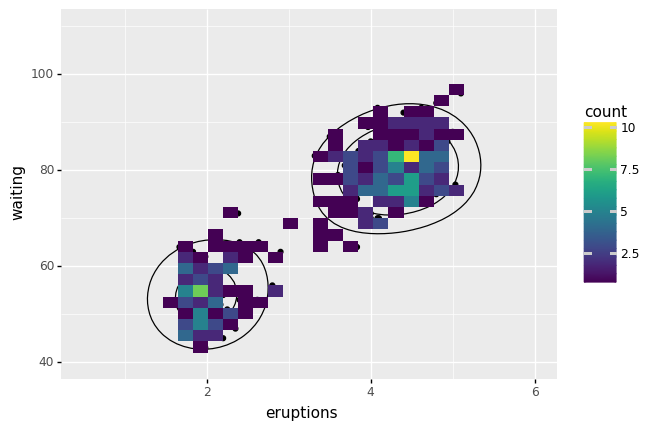

<ggplot: (8773117371949)>

In [21]:
g + geom_bin2d()

## Seaborn plot

In [8]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

<AxesSubplot:xlabel='displ', ylabel='hwy'>

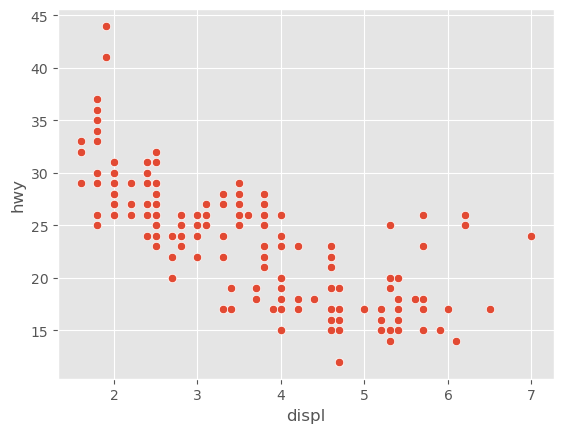

In [24]:
# similar plots in seaborn
sns.scatterplot(data=mpg, x='displ', y='hwy')

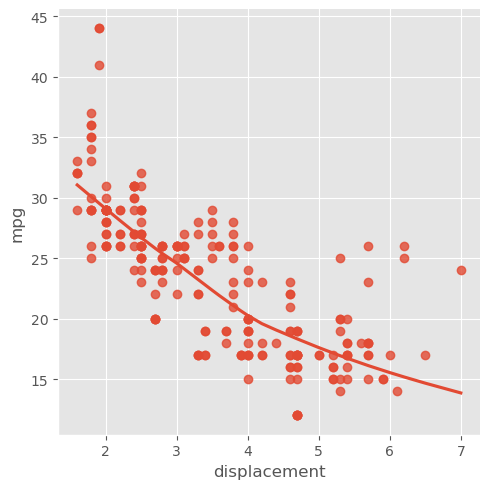

In [25]:
sns.lmplot(data=mpg, x="displ", y="hwy", lowess=True)
ax = plt.gca()
ax.set_xlabel("displacement")
ax.set_ylabel("mpg")
plt.show()

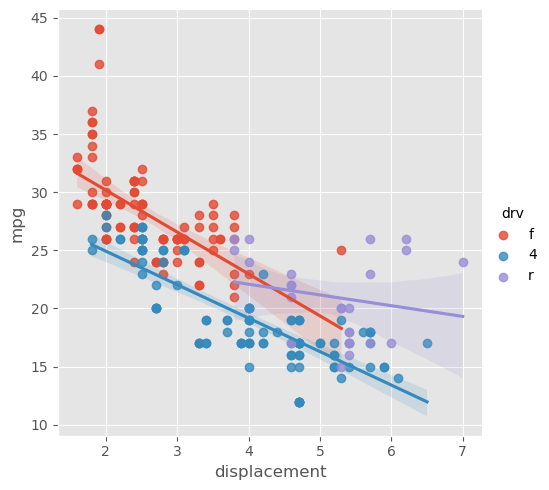

In [9]:
sns.lmplot(data=mpg, x="displ", y="hwy", hue="drv")
ax = plt.gca()
ax.set_xlabel("displacement")
ax.set_ylabel("mpg")
plt.show()

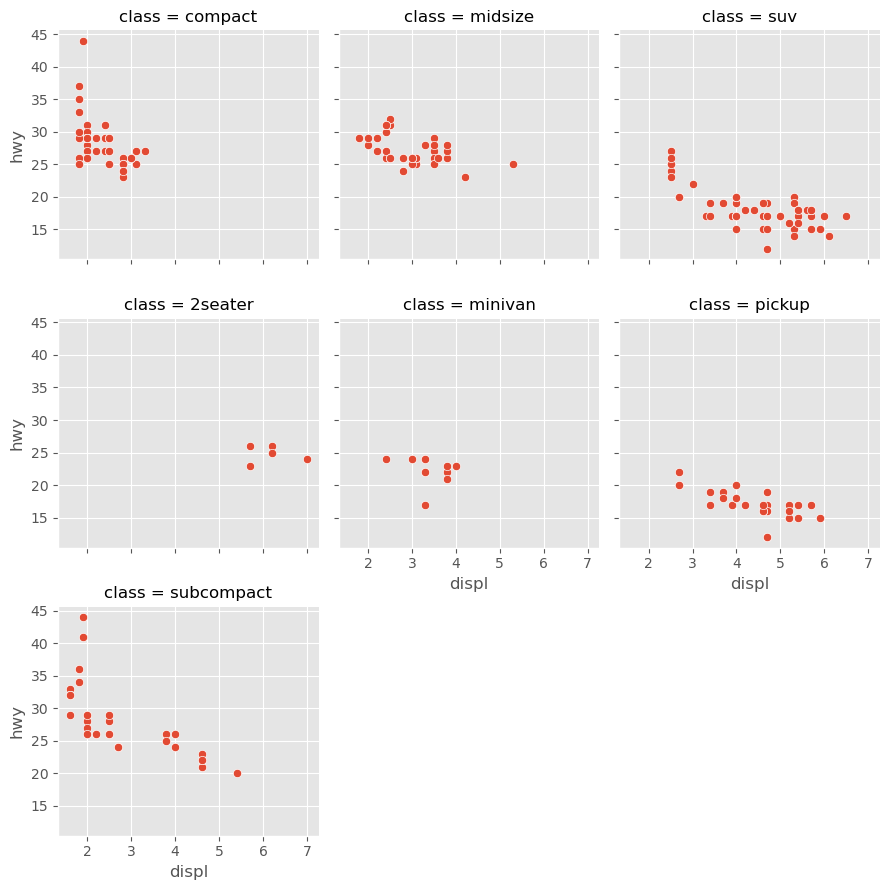

In [32]:
g = sns.FacetGrid(mpg, col="class", 
                  col_wrap=3)
g.map_dataframe(sns.scatterplot, 
                x="displ", y="hwy")
plt.show()

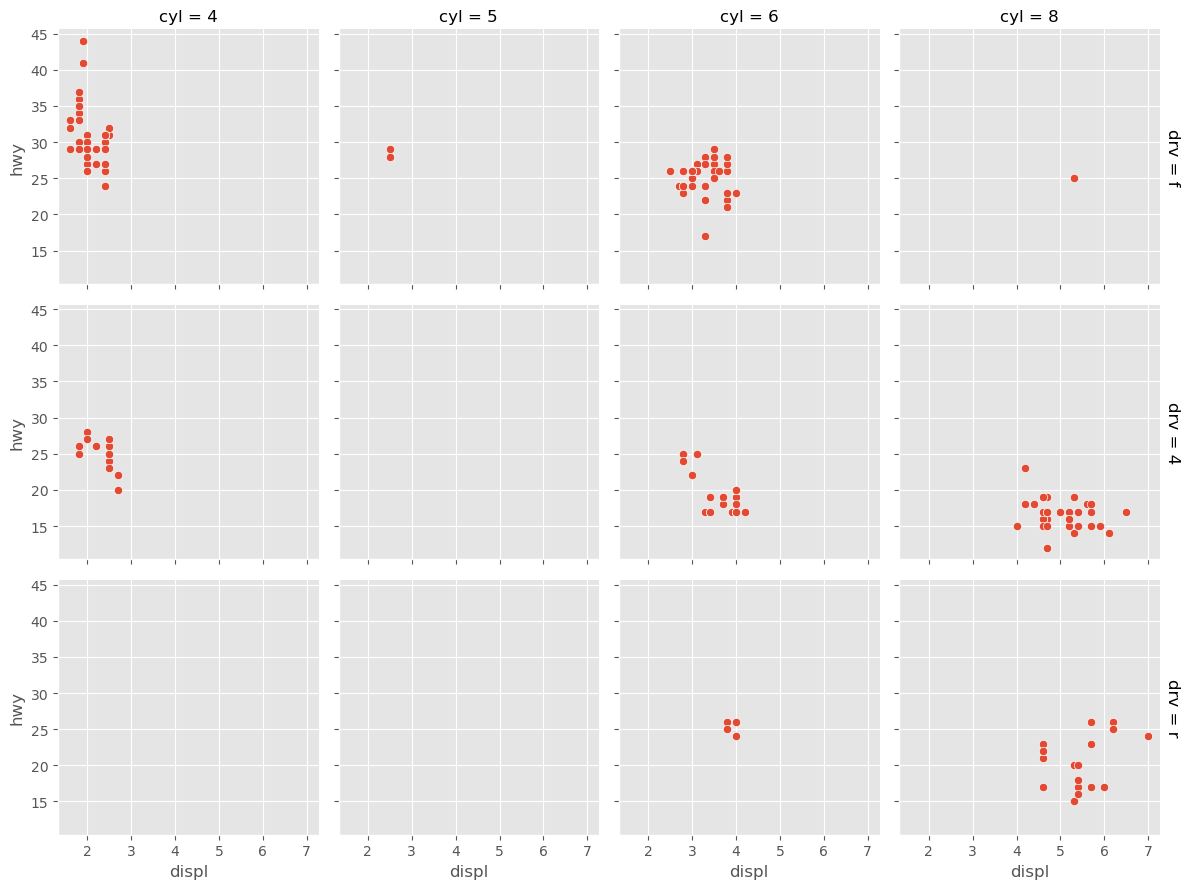

In [33]:
g = sns.FacetGrid(mpg, 
                  col="cyl", row="drv",
                  margin_titles=True)
g.map_dataframe(sns.scatterplot, x="displ", y="hwy")
plt.show()

## the seaborn module for faithful, some other figures I like

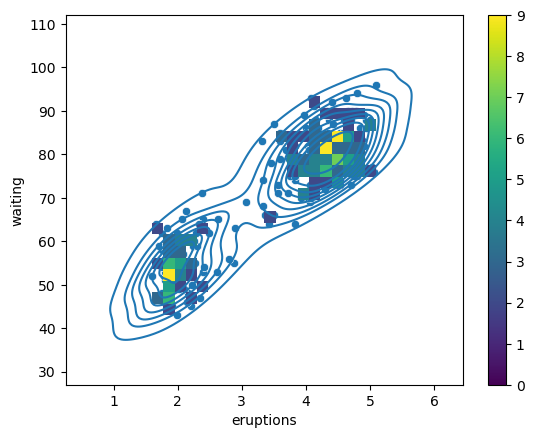

In [91]:
sns.scatterplot(data=faithful, x="eruptions", y="waiting")
sns.histplot(data=faithful, x="eruptions", y="waiting",
             bins=20, pthresh=.01, cmap="viridis", cbar=True)
sns.kdeplot(data=faithful, x="eruptions", y="waiting")
plt.show()

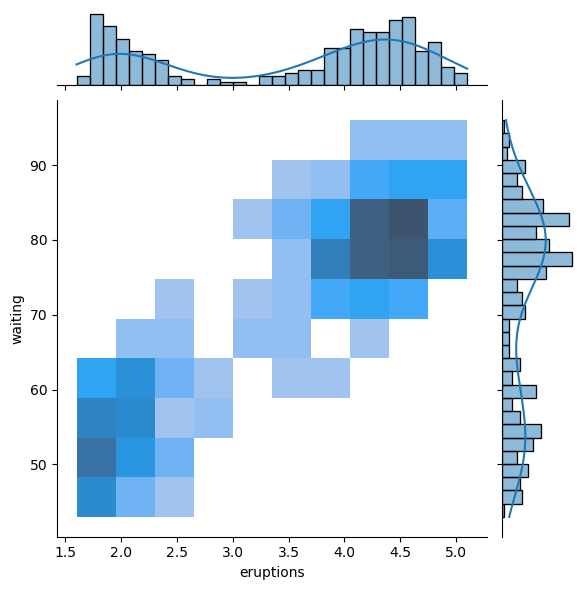

In [85]:
# I like this plot very much
sns.jointplot(x=faithful["eruptions"], 
              y=faithful["waiting"], 
              kind='hist',
              marginal_kws=dict(bins=30, kde=True),)

<AxesSubplot:xlabel='eruptions', ylabel='waiting'>

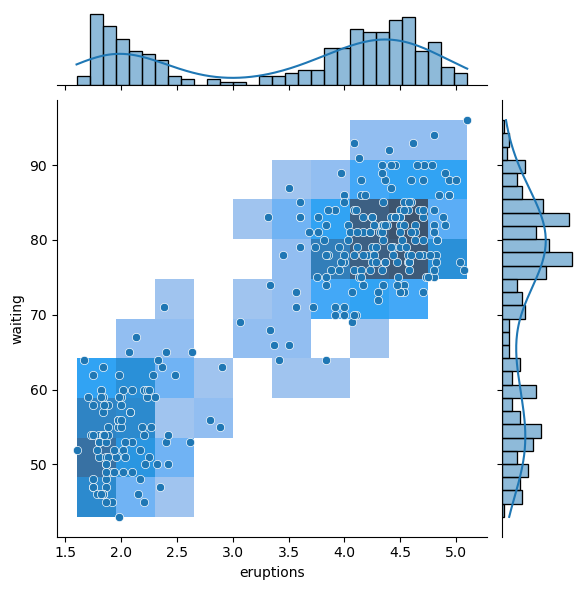

In [86]:
# note: jointplot has their own grid system, not same from Matplotlib
g = sns.jointplot(x=faithful["eruptions"], 
                  y=faithful["waiting"], 
                  kind='hist',
                  marginal_kws=dict(bins=30, kde=True))

sns.scatterplot(data=faithful,
                x="eruptions", y="waiting",
                ax=g.ax_joint)

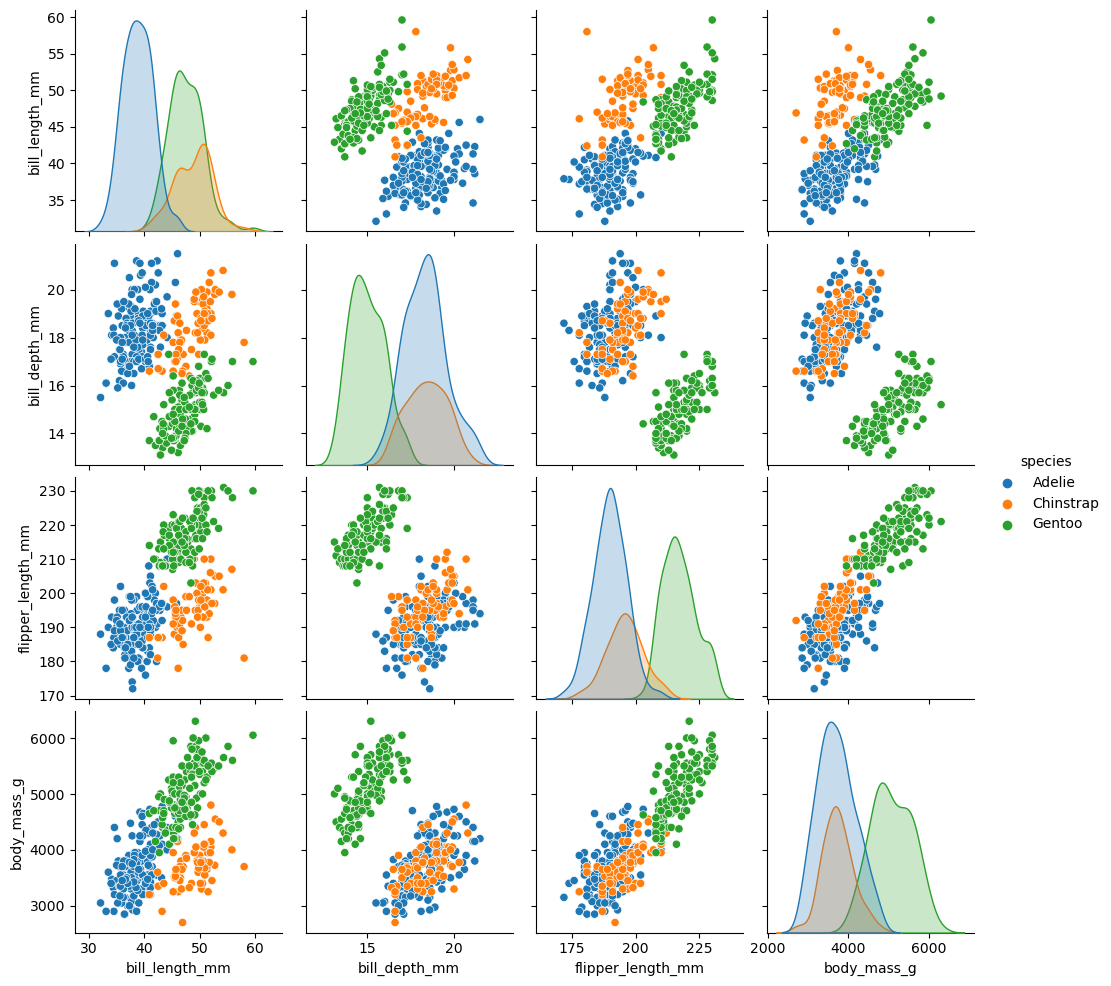

In [88]:
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

思想上的不同。
基础的底层包: Matplotlib/D3: 不考虑数据转换
声明式编程: 包含很多的数据处理与转换, 甚至是很多统计模型的处理
- 自上而下: 先大概说明数据与画图的关系，再说明画图中的几何类型，最后调整细节
- 非常快捷，语法简单（图片的种类比较有限，中间的统计也是计算大家公认的模型/套路）
- 对于统计学科来说，这些包已经足够使用
- 在python中，plotnine包基本上代替了ggplot2的内容
- matplotlib+seaborn结合了两者的优势
- seaborn又提供了另一套api叫做seaborn object, 非常类似于ggplot2的风格
- 这两个包都是静态的图像
- 没有涉及到交互式画图，或者说面向网页的画图（如plotly/altair等），后面可能会再出一期